In [3]:
import numpy as np
import PIL
import random
from PIL import Image
from PIL import ImageDraw
import pandas as pd
import copy

def ripple_outline_from_array(boolean_array, distance, width, color_1, color_2=(0,0,0,0)):
    
    circles_1 = Image.new("RGBA", (len(boolean_array[0]),len(boolean_array)), (0,0,0,0))
    
    draw_circles_1 = ImageDraw.Draw(circles_1, "RGBA")
    
    for y in range(len(boolean_array)):
        for x in range(len(boolean_array[0])):
            if boolean_array[y][x] == True:
                draw_circles_1.ellipse((x-distance, y-distance, x+distance, y+distance), fill=color_1)
                
    for y in range(len(boolean_array)):
        for x in range(len(boolean_array[0])):
            if boolean_array[y][x] == True:
                draw_circles_1.ellipse((x-distance+width, y-distance+width, x+distance-width, y+distance-width), fill=color_2)
    
    return circles_1

In [2]:
def ripple_from_color(image, color, distance, width):
    color_1 = (255,255,255,255)
    color_2=(0,0,0,0)
    circles_1 = Image.new("RGBA", (image.size[0], image.size[1]), (0,0,0,0))
    
    draw_circles_1 = ImageDraw.Draw(circles_1, "RGBA")
    
    data = np.asarray(image)
    array = np.array([ [(j == [color[0],color[1], color[2]]).all() for j in i] for i in data])
    
    for y in range(len(array)):
        for x in range(len(array[0])):
            if array[y][x] == True:
                draw_circles_1.ellipse((x-distance, y-distance, x+distance, y+distance), fill=color_1)
    for y in range(len(array)):
        for x in range(len(array[0])):
            if array[y][x] == True:
                draw_circles_1.ellipse((x-distance+width, y-distance+width, x+distance-width, y+distance-width), fill=color_2)
    ripple_color = Image.new("RGB", (image.size[0], image.size[1]), color)
    image.paste(ripple_color, (0,0), circles_1)
    return image

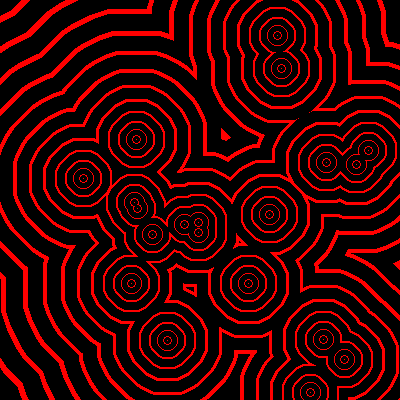

In [16]:
image = Image.new("RGB", (400,400))
draw = ImageDraw.Draw(image)
for i in range(20):
    x = random.randint(0,image.size[0])
    y = random.randint(0,image.size[1])
    coord = (x,y)
    draw.point(coord,(255,0,0))

for i in range(25):
    image = ripple_from_color(image, (255,0,0), 2*(i), int(i/2))
image